In [2]:
classes = [ 'CALsuburb', 'MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', \
            'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', \
            'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen']
import numpy as np
import os
import collections
import csv

from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

# Declare and make the results directory

In [3]:
results_directory = "results"

!mkdir $results_directory
outfile =  results_directory + '/classification_results-HOG-pca-artefact.csv'

mkdir: results: File exists


# Option 1: 
# Load X_train, X_test, Y_train, Y-test, npy
# Load the Training and test sets seperately
# y_train is assumed to have the same label order as in the above classes

# CHANGE THE BELOW FILE NAMES

In [4]:
X_train = np.load("features/X_train-HOG-pca-10-.npy")
X_test = np.load("features/X_test-HOG-pca-10-.npy")
y_train = np.load("features/y_train-HOG.npy")
y_test = np.load("features/y_test-HOG.npy")

print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape
print np.where(y_test == 0)

(3073, 10)
(773, 10)
(3073, 1)
(773, 1)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0]))


# Option 2: load X and y first as csv, then split into training and test set

In [ ]:
import pandas as pd

def load_csv_formatted(csvfile):
    """load csv file according to the format we specified in sharelatex
    assume each row is a sample
    assume each column is feature
    return X, y, featurename
    """


    df = pd.read_csv(csvfile)
    matr = df[df.keys()[4:]]
    feature_name = df.keys()[4][:-1]
    
    X = matr.as_matrix()
    labels = df['Class_Label']
    y = labels.as_matrix()
    length = y.shape[0]
    
    return X, y, feature_name

# CHANGE THE FILENAME BELOW TO LOAD

In [3]:
X, y, feature_name = load_csv_formatted("features/test_feature.csv")

NameError: name 'load_csv_formatted' is not defined

In [ ]:
from sklearn.cross_validation import StratifiedKFold

#DO NOT CHANGE
num_folds = 5
rand_seed = 123
train_indices, test_indices = next(iter(StratifiedKFold(y.flatten(), n_folds=num_folds, random_state=rand_seed)))

X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]

print "SHape of training", X_train.shape
print "SHape of training labels", y_train.shape
print "SHape of test", X_test.shape
print "SHape of test labels", y_test.shape

# Option 3: load X and y as npy, then split into trianing and test set (change the filename below)

In [2]:
X = np.load("features/X.npy")
y = np.load("features/y.npy")

(3083, 500)
(776, 500)
(3083, 1)
(776, 1)


In [ ]:
from sklearn.cross_validation import StratifiedKFold

#DO NOT CHANGE
num_folds = 5
rand_seed = 123
train_indices, test_indices = next(iter(StratifiedKFold(greyscale_labels.flatten(), n_folds=num_folds, random_state=rand_seed)))

X_train, y_train, X_test, y_test = X[train_indices], y[train_indices], X[test_indices], y[test_indices]

print "SHape of training", X_train.shape
print "SHape of training labels", y_train.shape
print "SHape of test", X_test.shape
print "SHape of test labels", y_test.shape

# After the loading options,
# Run the below to convert all the 0s in y_train to 13s, permute the labels. This will check if they're just defaulting to CALsuburb

In [16]:
y_train[y_train == 0 ] = 13
y_train -= 1
y_test[y_test == 0] = 13
y_test -= 1
classes.append(classes[0])
del classes[0]

In [17]:
print classes

['MITopencountry', 'PARoffice', 'livingroom', 'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', 'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen', 'CALsuburb', 'MIThighway']


# After the loading options, binarize the labels

In [8]:
from sklearn.preprocessing import LabelBinarizer

print "Let's binarize y so we can do multiclass classification"
lb = LabelBinarizer()
lb.fit(y_train)
y_train_bin = lb.transform(y_train)
y_test_bin = lb.transform(y_test)
print "Shape of Y_train after binarized is ", y_train_bin.shape
print "First elements of Y_train are", y_train_bin[0:20]

old_y_train = lb.inverse_transform(y_train_bin)
print "First elements of old_y_train are ", old_y_train[0:20]

Let's binarize y so we can do multiclass classification
Shape of Y_train after binarized is  (3073, 13)
First elements of Y_train are [[0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]]
First elements of old_y_train are  [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]


# Normalize all the features in X_train and X_test

In [9]:
from sklearn import preprocessing
upper_train_index = len(X_train)
X = np.concatenate((X_train, X_test))
X = preprocessing.scale(X, axis=0)

X_train = X[:upper_train_index]
X_test = X[upper_train_index:]


# Declare the base classification code

In [10]:
import numpy as np
from sklearn import metrics
import time



# This function trains and returns a dicitonary of results
def train(clf, X_train, X_test, y_train, y_test, used_label_binarizer, classes=range(13), name=None):
    """
    Returns: a dict of errors/performance
    """
    t = time.time()
    r = collections.OrderedDict()
    if name == None:
        name = str(clf)
    

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    
    y_test_multi = used_label_binarizer.inverse_transform(y_test)
    y_pred_multi = used_label_binarizer.inverse_transform(y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test_multi, y_pred_multi)
    
    
    precisions = metrics.precision_score(y_test_multi, y_pred_multi, average=None)
    recalls = metrics.recall_score(y_test_multi, y_pred_multi, average=None)
    f1scores = metrics.f1_score(y_test_multi, y_pred_multi, average=None)
    
    precision = metrics.precision_score(y_test_multi, y_pred_multi, average='weighted')
    recall = metrics.recall_score(y_test_multi, y_pred_multi, average='weighted')
    f1score = metrics.f1_score(y_test_multi, y_pred_multi, average='weighted')    
    
    auc = metrics.roc_auc_score(y_test, y_pred, average='weighted')
    
    r['Name'] = clf
    r['Precision'] = np.round(precision,2)
    r['Recall'] = np.round(recall,2)
    r['F1Score'] = np.round(f1score,2)
    r["Pred"] = y_pred
    r["Test"] = y_test
    r['Pred_Multi'] = y_pred_multi
    r['Test_Multi'] = y_test_multi
    r['Precisions'] = precisions
    r['Recalls'] = recalls
    r['F1Scores'] = f1scores
    for i in range(len(classes)): 
        r['Precisions_' + str(classes[i])] = precisions[i]
        r['Recall_' + str(classes[i])] = recalls[i]
        r['F1Score_' + str(classes[i])] = f1scores[i]
    
    r['Confusion Matrix'] = confusion_matrix
    r['Time'] = np.round(time.time() - t, 2)
    r['CLF'] = clf
    r['Name'] = name
    r['AUC'] = auc
    try:
        r['Param'] = clf.get_params(deep=True)
    except AttributeError:
        r['Param'] = None
    
    return r

# Run all the classifiers. 
# YOU CAN CHANGE THE BELOW PARAMETERS IF YOU'D LIKE.
# Note if it takes too long, you can kill the cell and you'll still have results from the earlier classifiers written out in the results csv file, as well as contained in the results list
# Each result in the list is a dictionary of attributes

In [11]:
# run over all classifiers

from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import time


results = []

# CLASSIFICATION PARAMETERS
neighbors = [5, 10, 15]
knns = [OneVsRestClassifier(KNeighborsClassifier(n_neighbors = n)) for n in neighbors]


num_features = len(X_train[0])
Cs = [10.0, 1.0, 0.01]
gammas = [1.0, 0.01, 1.0/num_features]

svcrbfs = []
for C in Cs:
    for gamma in gammas:
        svcrbf = OneVsRestClassifier(svm.SVC(C=C, gamma=gamma))
        svcrbfs.append(svcrbf)

lr = OneVsRestClassifier(LogisticRegression())
        
lsvc = OneVsRestClassifier(svm.LinearSVC())

maxLearners = 100
maxDepths = [5, 10, 50, 100]
dts = [DecisionTreeClassifier(max_depth = maxDepth) for maxDepth in maxDepths]
dt1s = [OneVsRestClassifier(DecisionTreeClassifier(max_depth = maxDepth)) for maxDepth in maxDepths]
rfs = [RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False) for maxDepth in maxDepths]
rf1s = [OneVsRestClassifier(RandomForestClassifier(n_estimators = maxLearners, max_depth = maxDepth, warm_start = False)) for maxDepth in maxDepths]


gnb = GaussianNB()



ab1 = OneVsRestClassifier(AdaBoostClassifier())

dummy = DummyClassifier()
dummy1 = OneVsRestClassifier(DummyClassifier())


# ----------------------------------------------------------------------------------------------------
# Perform the training and result writing below
# ----------------------------------------------------------------------------------------------------

for knn in knns:
    name = 'KNN' + str(knn.get_params()['estimator'].get_params()['n_neighbors'])
    print name
    result = train(knn, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile

            
for svcrbf in svcrbfs:
    name = 'SVCRBF' + 'C' + str(svcrbf.get_params()['estimator'].get_params()['C']) + 'gamma' + str(svcrbf.get_params()['estimator'].get_params()['gamma'])
    print name
    result = train(svcrbf, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile


name = 'LSVC'
print name
result = train(lsvc, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
results.append(result)
results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)
    print "Results written to ", outfile


for dt in dts:
    name = 'DT' + str(dt.get_params()['max_depth'])
    print name
    result = train(dt, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile

for dt1 in dt1s:
    name = 'DT1' + str(dt1.get_params()['estimator'].get_params()['max_depth'])
    print name
    result = train(dt1, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile
    
for rf in rfs:
    name = 'RF' + 'max_depth' + str(rf.get_params()['max_depth']) + '_num_learners' + str(rf.get_params()['n_estimators'])
    print name
    result = train(rf, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile
    
for rf1 in rf1s:
    name = 'RF1' + 'max_depth' + str(rf1.get_params()['estimator'].get_params()['max_depth']) + '_num_learners' + str(rf1.get_params()['estimator'].get_params()['n_estimators'])
    print name
    result = train(rf1,X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
    print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
    results.append(result)
    results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
    print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
    with open(outfile, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
        writer.writeheader()
        for row in results:
            writer.writerow(row)
        print "Results written to ", outfile
    
# name = 'GNB'
# print name
# result = train(gnb, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
# print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
# results.append(result)
# with open(outfile, 'w') as csvfile:
#     writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
#     writer.writeheader()
#     for row in results:
#         writer.writerow(row)
#     print "Results written to ", outfile

name = 'LR'
print name
result = train(lr, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
results.append(result)
results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)
    print "Results written to ", outfile


name = 'AB'
print name
result = train(ab1, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
results.append(result)
results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)
    print "Results written to ", outfile

name = 'Dummy'
print name
result = train(dummy, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
results.append(result)
results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)
    print "Results written to ", outfile

name = 'Dummy1'
print name
result = train(dummy1, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes, name=name)
print "Precision", result['Precision'], "Recall", result['Recall'], "F1Score", result['F1Score'], "AUC", result['AUC'], "Time", result['Time']
results.append(result)
results = sorted(results, key = lambda entry: entry['F1Score'], reverse=True)
print "Best result is F1-score ", results[0]['F1Score'], "for classifier ", results[0]['CLF']
with open(outfile, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=results[0].keys())
    writer.writeheader()
    for row in results:
        writer.writerow(row)
    print "Results written to ", outfile
    
    

KNN5
Precision 0.59 Recall 0.44 F1Score 0.47 AUC 0.701462668827 Time 0.63
Best result is F1-score  0.47 for classifier  OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
          n_jobs=1)
Results written to  results/classification_results-HOG-pca-artefact.csv
KNN10


KeyboardInterrupt: 

# Find the important Features using random forest gini feature importsnces

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import csv

feat_file_prefix = "results/feature_importances_pca-artefact"
maxLearners = 100
maxDepth = 100

labels = range(13)

for i in range(13):
    
    this_y_train = (y_train == i).flatten()
    forest = DecisionTreeClassifier(max_depth = maxDepth)
    forest.fit(X_train, this_y_train)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    with open(feat_file_prefix + str(classes[i]) + ".csv", 'w') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Index', 'Importance'])
        for f in range(len(X_train[0])):
            writer.writerow([indices[f], importances[indices[f]]])
    print "Feature importances written to ", feat_file_prefix + str(classes[i]) + ".csv"
        

Feature importances written to  results/feature_importances_pca-artefactMIThighway.csv
Feature importances written to  results/feature_importances_pca-artefactMITopencountry.csv
Feature importances written to  results/feature_importances_pca-artefactPARoffice.csv
Feature importances written to  results/feature_importances_pca-artefactlivingroom.csv
Feature importances written to  results/feature_importances_pca-artefactMITcoast.csv
Feature importances written to  results/feature_importances_pca-artefactMITinsidecity.csv
Feature importances written to  results/feature_importances_pca-artefactMITstreet.csv
Feature importances written to  results/feature_importances_pca-artefactbedroom.csv
Feature importances written to  results/feature_importances_pca-artefactMITforest.csv
Feature importances written to  results/feature_importances_pca-artefactMITmountain.csv
Feature importances written to  results/feature_importances_pca-artefactMITtallbuilding.csv
Feature importances written to  result

# Write a confusion matrix out to csv and plot it.

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, classes=classes):
    # First normalize into recalls.
    cm = np.array(cm) * 1.0 / np.sum(cm, axis=1)
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

### Choose which classifier and name of confusion file below, first

In [14]:
print classes

['MIThighway', 'MITopencountry', 'PARoffice', 'livingroom', 'MITcoast', 'MITinsidecity', 'MITstreet', 'bedroom', 'MITforest', 'MITmountain', 'MITtallbuilding', 'kitchen', 'CALsuburb']


OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          n_jobs=1)


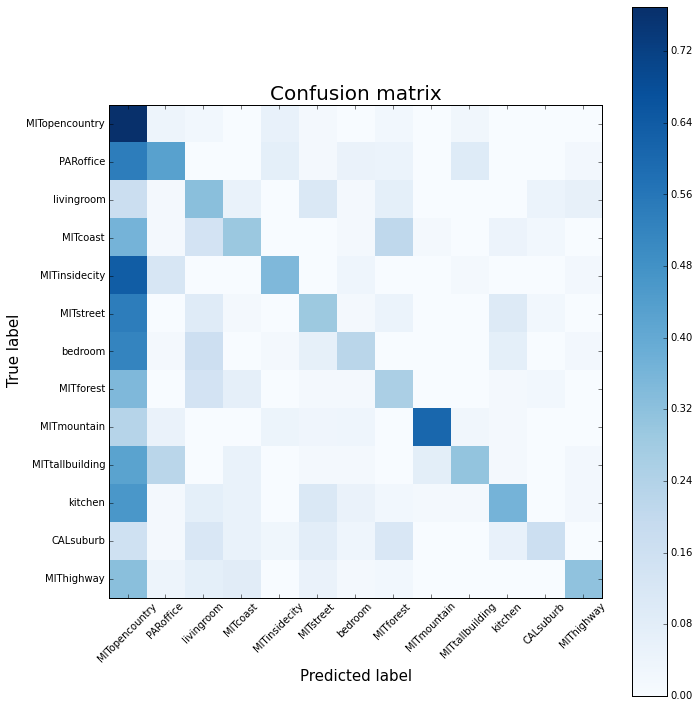

In [18]:
# look at confusion matrices of the best

from sklearn.cross_validation import StratifiedKFold
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

confusefile = 'results/DT100-pca-CONFUSIONMATRIX-artefact.csv'



# CHOOSE YOUR CLASSIFIER AND FILE NAME
maxDepth = 100
clf = OneVsRestClassifier(DecisionTreeClassifier(max_depth = maxDepth))



print clf
r = train(clf, X_train, X_test, y_train_bin, y_test_bin, used_label_binarizer=lb, classes=classes)

confuse = r['Confusion Matrix']

plot_confusion_matrix(confuse)

with open(confusefile, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([''] + classes)
    for i in range(len(confuse)):
        writer.writerow([classes[i]] + list(confuse[i]))

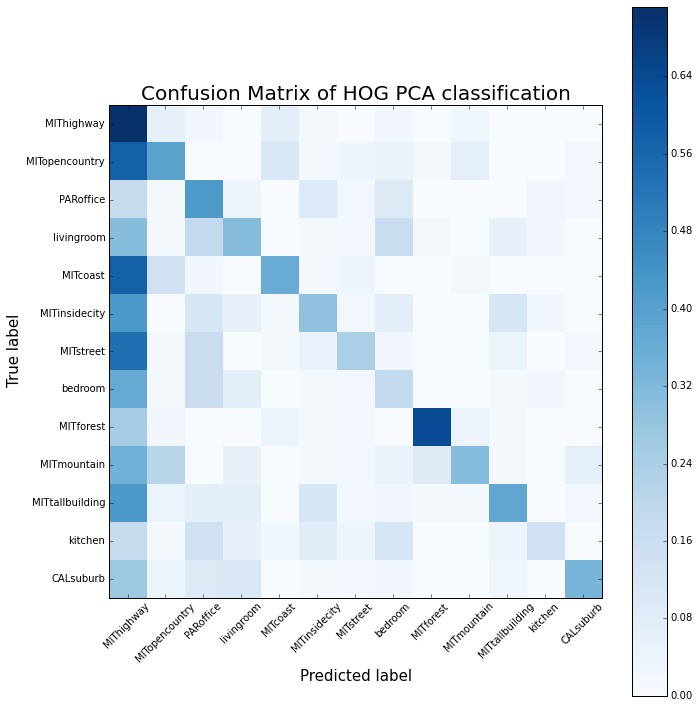

In [15]:
plot_confusion_matrix(confuse, title="Confusion Matrix of HOG PCA classification")